<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.4
# *PCA Lab*

**In this lab, we will:**
- Explore how PCA is related to correlation.
- Use PCA to perform dimensionality reduction.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics

In [297]:
#Import cleaned and transformed data
breast_cancer_csv = pd.read_csv(r'/Users/annaxu/Documents/Data Science/DATA/breast-cancer-wisconsin-data-Transformed.csv', index_col = 0)
breast_cancer_csv.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  fractal_dimension_worst
id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
842302            1     1.255031      1.016197        2.089198  10.003332        -2.133687         -0.556581        0.547814             0.383536      -0.616364                0.280553   0.913242    0.967381      0.116428  5.353138     156.274418       -1.309450      0.377345           0.125976    33.300033              0.183640      1.404492       2.852439         2.266232   12.638982         -1.818925          -0.176787         0.233478                0.2654       -0.337148                 8.410429
842517            1     1.313234      1.249687        2.123525  10.986209        -2.468168         -1.104356        0.294788             0.264896      -0.741842                0.238055   1.839926    0.902012      0.294291  4.199849     191.387560       -1.883392      0.264954           0.115758    71.994240              0.152291      1.397766       3.153163         2.200850   12.506130         -2.089088          -0.729088         0.093982                0.1860       -0.560667                11.233431
84300903          1     1.294246      1.327359        2.113943  10.635434        -2.210918         -0.796152        0.444297             0.357631      -0.684240                0.244929   1.341202    0.923223      0.218103  4.547320     162.601626       -1.397289      0.337139           0.143457    44.444444              0.165960      1.372360       3.239854         2.183270   11.955856         -1.935168          -0.372122         0.161488                0.2430       -0.442132                11.418132
84348301          1     1.057666      1.309204        1.889750   7.281708        -1.948413         -0.546835        0.491325             0.324345      -0.585528                0.312154   2.017756    1.049508      0.290276  3.008494     109.769484       -1.127378      0.383970           0.136638    16.770082              0.209599      1.173478       3.277145         1.995065    8.280177         -1.561601          -0.062332         0.227089                0.2575       -0.177963                 5.780347
84358402          1     1.307282      1.156549        2.130655  10.905527        -2.299590         -0.876802        0.444972             0.322955      -0.742561                0.242549   1.320655    0.921028      0.183891  4.553919      87.032202       -1.608888      0.384580           0.137295    56.947608              0.172299      1.352954       2.813611         2.182415   11.634834         -1.984859          -0.688246         0.146128                0.1625       -0.626353                13.024225

### 2. EDA

Explore dataset. Clean data. Find correlation.

In [300]:
#Imported cleaned and transformed data, correlation is part of the next stage.

### 3. Subset & Normalise

Subset the data to only include all columns except diagnosis, then apply StandardScaler.

In [303]:
#Subset data to include all columns except diagnosis
X = breast_cancer_csv.loc[:, breast_cancer_csv.columns != 'diagnosis']
#Standardise the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Calculate correlation matrix

We will be using the correlation matrix to calculate the eigenvectors and eigenvalues.

In [306]:
correlation_matrix = X.corr()
correlation_matrix

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  fractal_dimension_worst
radius_mean                 1.000000      0.321003        0.997979   0.995132         0.155144          0.496349        0.683122             0.794898       0.141010               -0.337756  -0.538529   -0.113430     -0.541969  0.796950       0.285203        0.265390      0.381869           0.442945     0.216128             -0.030950      0.976288       0.308527         0.971563    0.963351          0.119102           0.475516         0.579576              0.751998        0.192840                -0.027299
texture_mean                0.321003      1.000000        0.327014   0.330148        -0.012431          0.246625        0.320816             0.282029       0.091528               -0.062579  -0.336626    0.456799     -0.366768  0.356494      -0.037958        0.252347      0.222222           0.175899    -0.017553              0.118952      0.352099       0.919304         0.358149    0.355421          0.080047           0.271752         0.329753              0.312678        0.124672                -0.120534
perimeter_mean              0.997979      0.327014        1.000000   0.993075         0.191889          0.545356        0.721617             0.823755       0.173552               -0.287010  -0.549224   -0.104167     -0.560615  0.804729       0.265730        0.312233      0.420235           0.475405     0.198966              0.012705      0.976891       0.315194         0.977025    0.963584          0.150457           0.518769         0.617959              0.781275        0.217198                -0.073797
area_mean                   0.995132      0.330148        0.993075   1.000000         0.157602          0.497817        0.689331             0.797268       0.147351               -0.325903  -0.559517   -0.093893     -0.562174  0.825928       0.256473        0.270494      0.378130           0.436436     0.200757             -0.014888      0.977390       0.314854         0.972068    0.974476          0.127370           0.469200         0.579782              0.753598        0.189605                -0.031794
smoothness_mean             0.155144     -0.012431        0.191889   0.157602         1.000000          0.678551        0.519334             0.559780       0.544581                0.580181  -0.334050    0.098999     -0.327021  0.292880      -0.349351        0.389527      0.329957           0.401674    -0.168552              0.352805      0.205122       0.041071         0.229682    0.203377          0.819959           0.487553         0.433033              0.501482        0.389790                -0.512368
compactness_mean            0.496349      0.246625        0.545356   0.497817         0.678551          1.000000        0.888970             0.838204       0.554509                0.533932  -0.477838    0.051804     -0.569379  0.546646      -0.144161        0.817383      0.732355           0.689827    -0.113468              0.594089      0.536034       0.258376         0.588082    0.528412          0.593514           0.903469         0.828770              0.821857        0.476358                -0.699865
concavity_mean              0.683122      0.320816        0.721617   0.689331         0.519334          0.888970        1.000000             0.940175       0.452612                0.292771  -0.524857    0.049793     -0.606714  0.678165      -0.072271        0.738357      0.825118           0.750482    -0.028729              0.473107      0.708063       0.334163         0.749414    0.704339          0.481754           0.832690         0.916743         

### 4. Calculate the eigenvalues and eigenvectors from the correlation matrix

numpy has a convenient function to calculate this:

    eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

In [335]:
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

### 5. Calculate and plot the explained variance

A useful measure is the **explained variance**, which is calculated from the eigenvalues.

The explained variance tells us how much information (variance) is captured by each principal component.

### $$ ExpVar_i = \bigg(\frac{eigenvalue_i}{\sum_j^n{eigenvalue_j}}\bigg) * 100$$

In [312]:
def calculate_cum_var_exp(eigenvalues):
    total = sum(eigenvalues)
    var_exp = []
    for i in eigenvalues:
        var_i = (i / total)*100
        var_exp.append(var_i)
    cum_var_exp = np.cumsum(var_exp)
    return cum_var_exp

In [314]:
def plot_var_exp(eigenvalues):

    cum_var_exp = calculate_cum_var_exp(eigenvalues)

    plt.figure(figsize=(6,4))

    component_number = [i+1 for i in range(len(cum_var_exp))]

    plt.plot(component_number, cum_var_exp, lw=7)

    plt.axhline(y=0, linewidth=3, color='grey', ls='dashed')
    plt.axhline(y=100, linewidth=3, color='grey', ls='dashed')

    ax = plt.gca()
    ax.set_xlim([1,30])
    ax.set_ylim([-5,105])

    ax.set_ylabel('Cumulative variance explained', fontsize=12)
    ax.set_xlabel('No. of Principal Components', fontsize=12)

    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(10)

    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(10)

    ax.set_title('Cumulative variance explained at each principal component', fontsize=12)

    plt.show()

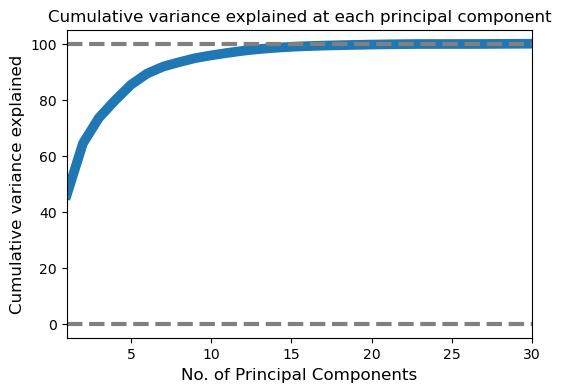

In [316]:
plot_var_exp(eigenvalues)

Interpretation:
- The graph shows that 8-10 principal components explain 90-95% of the variance in the data.

### 6. Using sklearn For PCA

    from sklearn.decomposition import PCA
    
- Create an instance of PCA
    - Fit X
- Plot the cumulative explained variance
- Apply dimensionality reduction to X with n_components=16
    - Fit and transform X
- Create a pairplot of PCA-transformed data

In [320]:
# Create an instance of PCA (do not set n_components)
pca = PCA()

# Fit Xs (breast cancer dataset having standardised features)
pca.fit(X_scaled)

PCA()

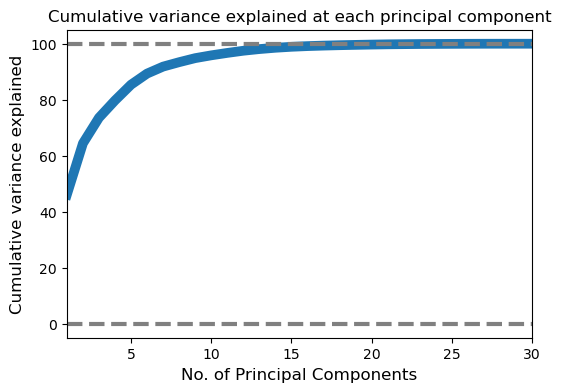

In [322]:
# Plot cumulative variance explained vs number of components using the plot_var_exp function from above
eigenvalues = pca.explained_variance_
plot_var_exp(eigenvalues)

In [324]:
# Create another instance of PCA (this time with n_components = 16)
pca = PCA(n_components = 16)
# Fit and transform Xs (breast cancer dataset having standardised features)
pca.fit_transform(X_scaled)

array([[ 7.92223109e+00,  1.98862873e+00, -1.96150532e+00, ...,
        -4.32234260e-01,  1.07693980e+00,  2.04668152e-01],
       [ 2.88709435e+00, -3.69608094e+00, -4.22186996e-01, ...,
        -8.80905499e-02, -2.04214415e-01, -2.28600585e-01],
       [ 6.07091320e+00, -8.34723846e-01, -1.96793440e-01, ...,
        -2.04926962e-01, -2.65345941e-01,  6.56578798e-01],
       ...,
       [ 2.20945877e+00, -2.05668694e+00,  1.24741384e+00, ...,
         3.53823830e-02, -1.06929847e-01,  8.05028152e-02],
       [ 9.25796315e+00,  1.23204309e+00,  4.92181120e-03, ...,
        -5.57912202e-02, -2.61711079e-01, -1.54245302e-02],
       [-8.12693891e+00, -6.73254509e-01,  3.04733069e+00, ...,
        -1.53964530e+00, -1.04748059e-01,  5.38200700e-01]])

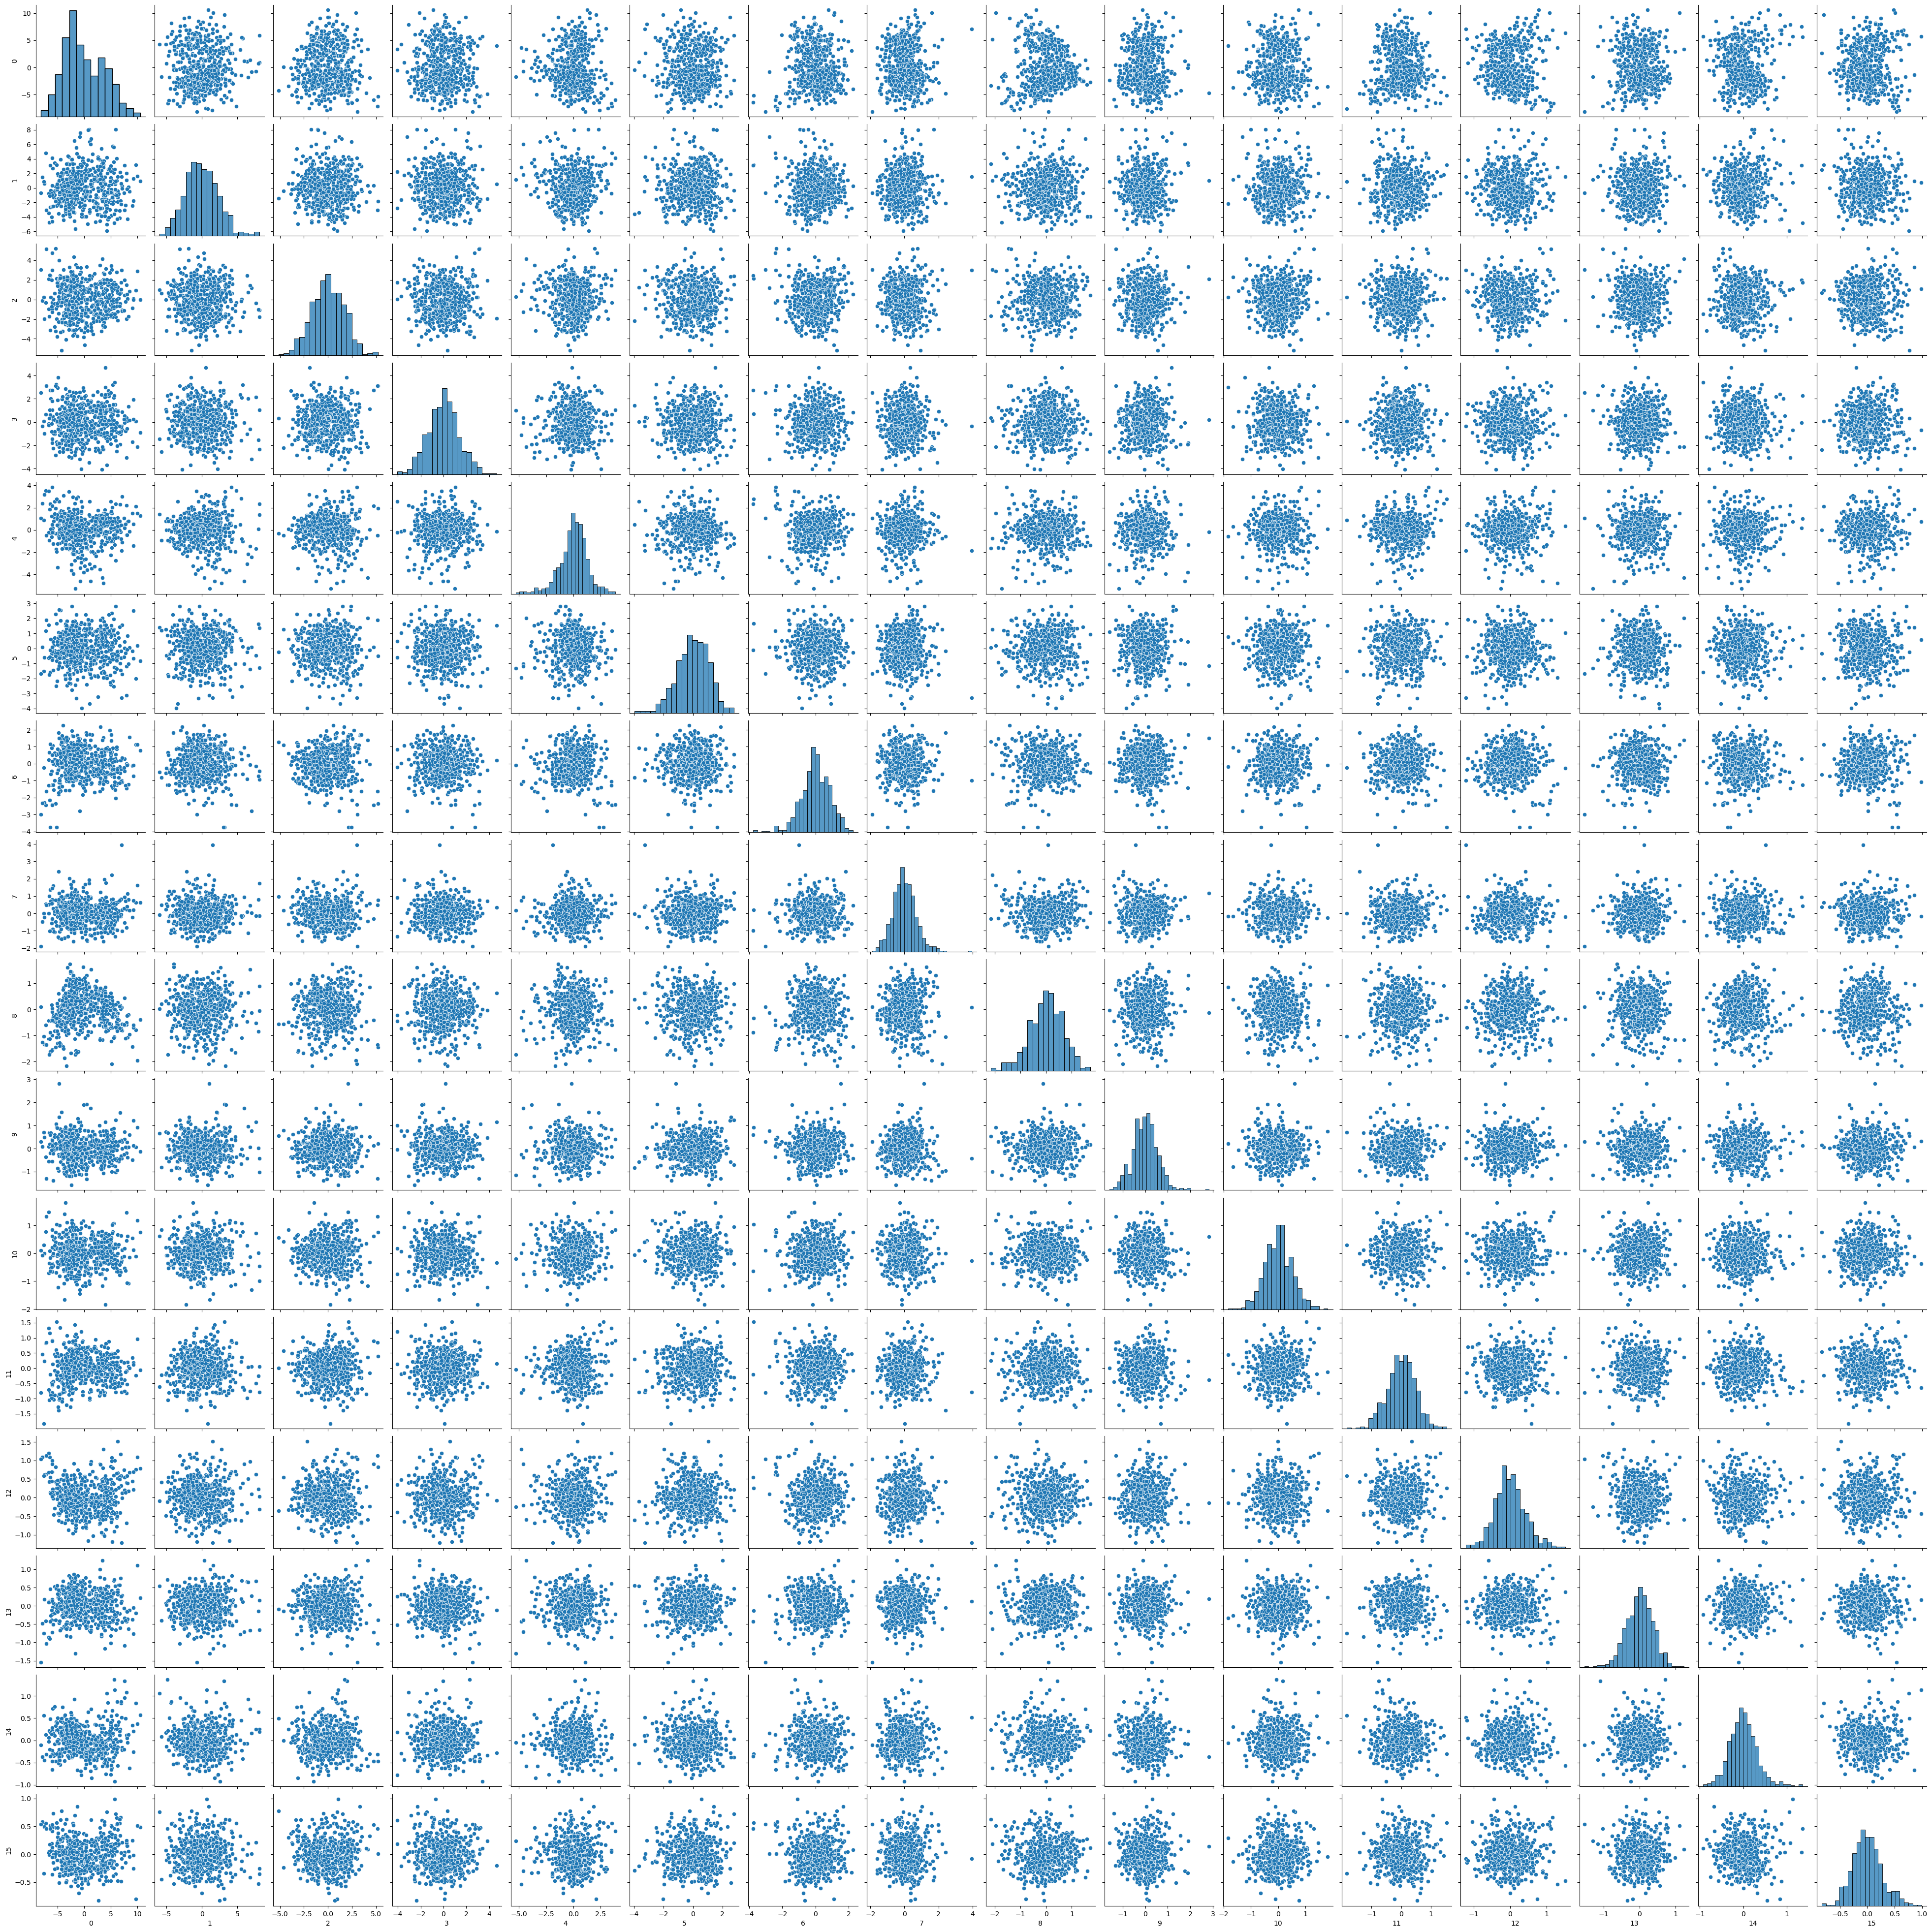

In [326]:
# Create a pairplot of PCA-transformed data
sns.pairplot(pd.DataFrame(pca.fit_transform(X_scaled)))
plt.show()

You should notice that the transformed features have been decorrelated (neither increasing nor decreasing trends in pairs of variables).

### 7. Split Data to 80/20 and use PCA prior to a supervised learning task

In this section we use PCA as a preprocessing step to a supervised learning algorithm.

In [346]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

Split the original dataset 80/20. Then apply standard scaler followed by PCA.

In [364]:
y = breast_cancer_csv['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply standard scaler to X_train and X_test (fit_transform on X_train, transform on X_test):
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) #transform because it has already learnt the transformation

# Instantiate the PCA class and set at 16 components
pca = PCA(n_components = 16)

# Apply PCA to the standardised features
X_train_scaled_pca = pca.fit_transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

Apply a KNN algorithm on `X_train_scaled` and `X_train_scaled_pca` with 5 neighbours, then evaluate using `X_test_scaled` and `X_test_scaled_pca`. Has performance been impacted as a result of dimension reduction?

In [367]:
# Set KNN classifier to use 5 neighbours and fit to X_train_scaled
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Test accuracy of KNN using standardised data
y_pred_class = knn.predict(X_test_scaled)
print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_test, y_pred_class)))

Accuracy: 93.81%


In [371]:
# Set KNN classifier to use 5 neighbours and fit to X_train_scaled_pca
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled_pca, y_train)

# Test accuracy of KNN using standardised PCA-transformed data
y_pred_class = knn.predict(X_test_scaled_pca)
print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_test, y_pred_class)))

Accuracy: 94.69%


Intepretation:
- KNN accuracy was slightly better with PCA which suggests PCA successfully removed noise, improved class separability or reduced dimensionality.

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Breast Cancer Machine Learning Prediction](https://gtraskas.github.io/post/breast_cancer/)

[Understanding PCA (Principal Component Analysis) with Python](https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21)



---



---



> > > > > > > > > © 2025 Institute of Data


---



---



